<a href="https://colab.research.google.com/github/rahule-1999/DDA-python/blob/main/Week_1/Puzzle_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


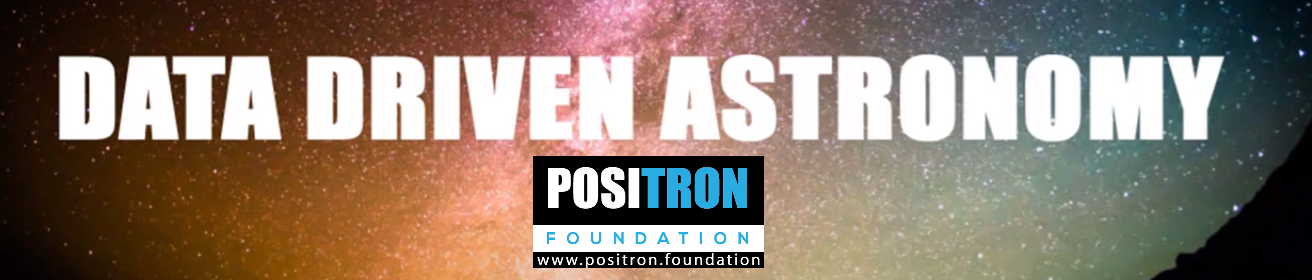




Welcome to **Data Driven Astronomy** Online course organized by **Positron Foundation**


# **Initialization**

In [59]:
!pip install sep --quiet
!pip install photutils --quiet
!pip install astroquery --quiet

In [60]:
import numpy as np
import astropy
from matplotlib import pyplot as plt
from astroquery.skyview import SkyView
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
from astropy.modeling import models, fitting
# To improve Aesthetics of plots

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

In [61]:
# Do no change.
!git clone https://github.com/Jack3690/DDA

fatal: destination path 'DDA' already exists and is not an empty directory.


In [62]:
cd /content/DDA/Week_1/data

/content/DDA/Week_1/data


# **Puzzle III**

Write code for getting 'SDSSg' image of 'NGC 4826' with radius 10 arcminutes and 512 pixels.

In [63]:
# Complete the code
path = SkyView.get_images(position='NGC 4826',radius=10*u.arcmin,pixels=512, survey=['SDSSg'])

data = path[0][0].data

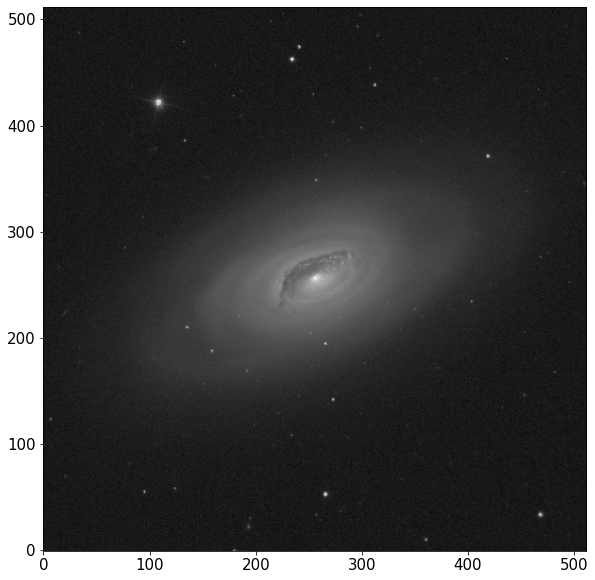

In [64]:
# Plot the data with standard setting i.e. LogStretch, cmap='gray' and origin='lower'
norm = ImageNormalize(stretch = LogStretch())

# Complete the code
plt.imshow(data, cmap = 'gray' , norm=norm, origin='lower')

Write code for moddeling the data using Sersic2D and LevMarLSQFitter

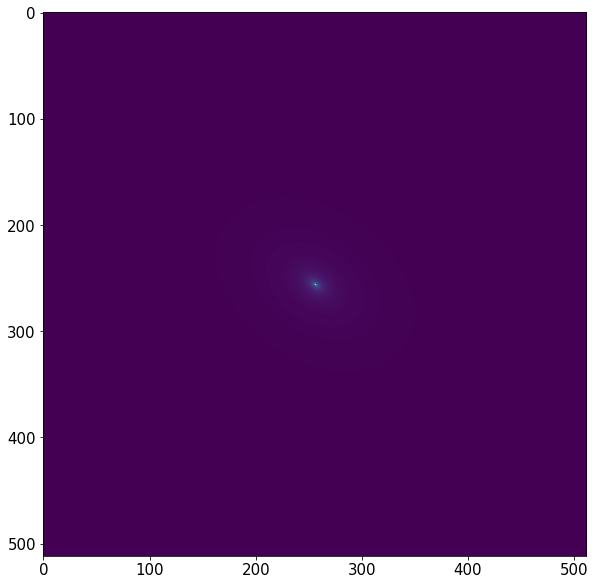

In [65]:
# Initialize with Sersic2D model
init = models.Sersic2D()

# Choosing the fitting method
fit = fitting.LevMarLSQFitter()

# Creating a x,y mesh for giving every point in the image an x,y coordinate and normalizing it to [-1,1]

y,x = np.mgrid[-256:256,-256:256]/256

# Fit the model to data

model = fit(init,x,y,z = data)
model

# Plot the model using standard setting
plt.imshow(model(x,y))

Subtract model from  to create residual image and plot the residual image with standard settings

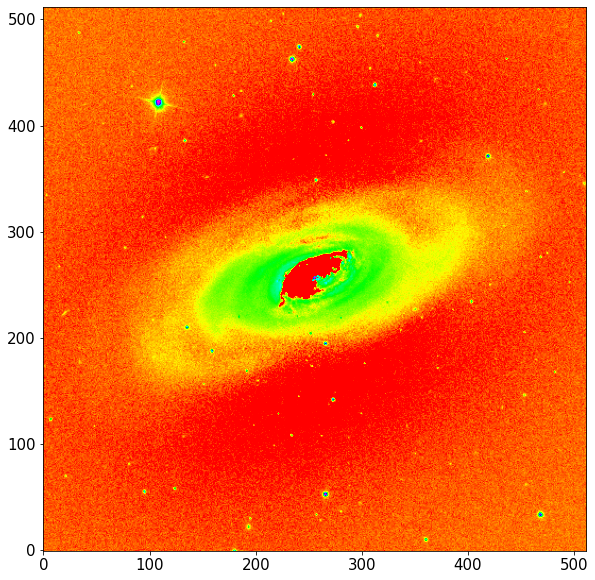

In [66]:
# Subtract model from data and plot it
residual = data-model(x,y)

# Plot the residual with standard setting except cmap = 'hsv'
plt.imshow(residual, cmap = 'hsv', origin = 'lower', norm = norm)

We can clearly see the dust lanes in the residual image. Therefore we see residual images help in extracting underlying structures in images

Write code for getting the image data from the fits file 'puzzle_3.fits'.

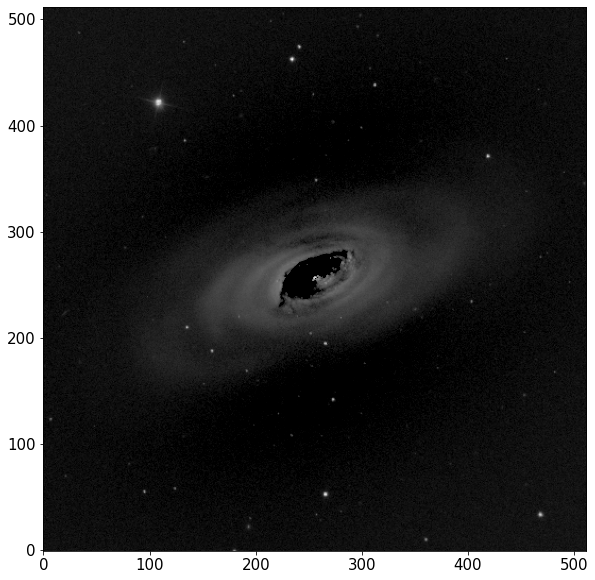

In [67]:
f = fits.open('puzzle_3.fits')

data_p = f[0].data      # Puzzle data

# Plot the data
plt.imshow(data_p,norm=norm,cmap='gray',origin='lower')


Subtract resid from data_p and plot the resultant array using standard setting

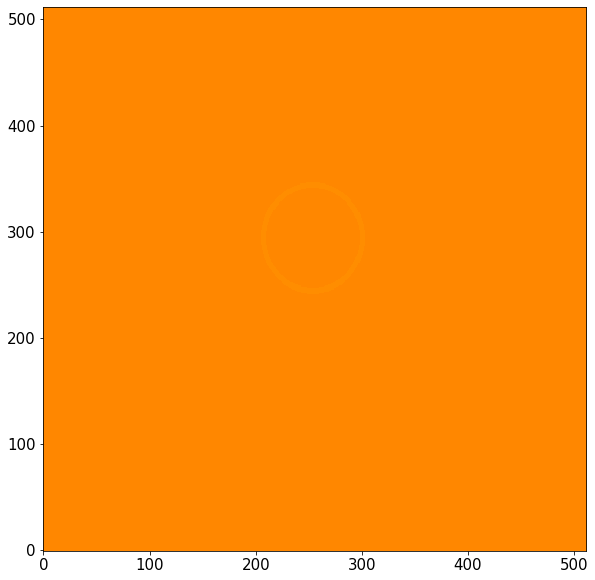

In [68]:
data_p3 = data_p - residual

plt.imshow(data_p3,norm=norm,cmap='hsv',origin='lower')

Upload 'puzzle_1_solution.fits' and 'puzzle_2_solution.fits' to DDA/Week_1/data folder in current colab session and load the fits data

In [69]:
f1 = fits.open('puzzle_1_solution.fits')
data_p1 = f1[0].data

f2 = fits.open('puzzle_2_solution.fits')
data_p2 =f2[0].data

Write code for adding for adding data_p1, data_p2, and data_p3. Plot the resultant array

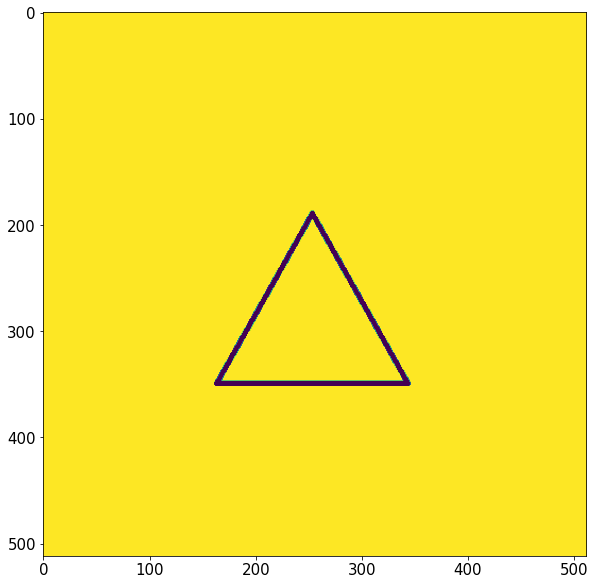

In [70]:
plt.imshow(data_p1)

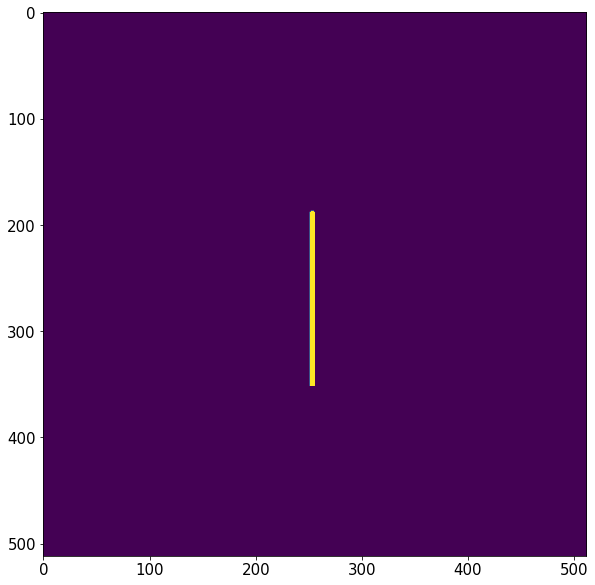

In [71]:
plt.imshow(data_p2)

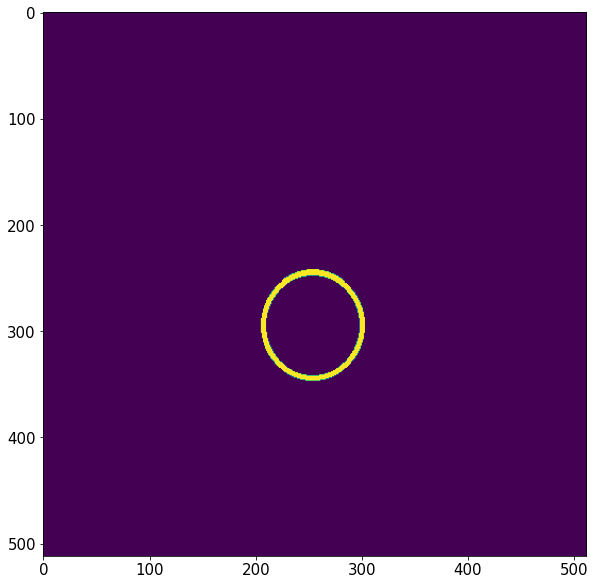

In [72]:
plt.imshow(data_p3)

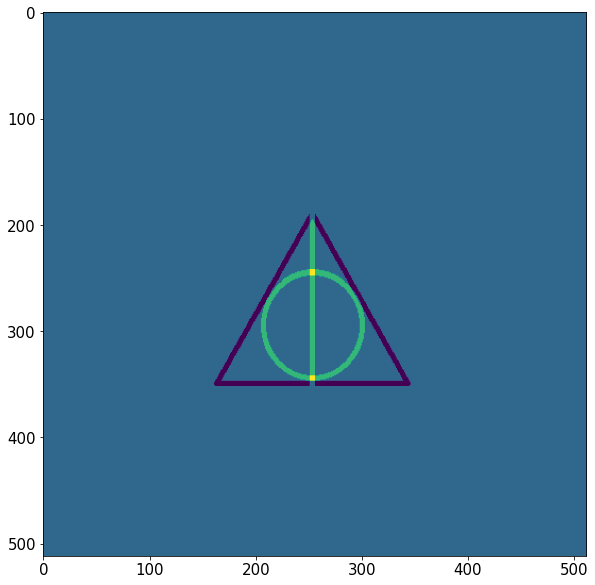

In [73]:
data_sum =data_p1 + data_p2 + data_p3

plt.imshow(data_sum)

Save the final array as a fits file with name 'puzzle_3_solution.fits' for submission and future reference.

In [74]:
hdu  = fits.PrimaryHDU(data_sum)
# Complete the code
hdul = fits.HDUList(hdu)
hdul.writeto('puzzle_3_solution.fits', overwrite = True)